<a href="https://colab.research.google.com/github/dinesh-umkc/kdm/blob/main/Fake%20News%20Detection%20ICP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective
Fake news detaction

Try below vectorization method
1. Count vectorization
2. Word Level tf-idf
3. Ngram level tf-ifd  
4. Character tf-idf
5. Hashing Vector

Use below Classifiers

1. Logistic regression
2. Navie Bayes
3. SVM  




In [8]:
#import modules
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics,svm
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
#Gdrive access
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
#Read the data
df = pd.read_csv('/content/gdrive/MyDrive/Projects/Data/news.csv')

#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
#Get the labels
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [10]:
# Split the dataset
train_x, valid_x, train_y, valid_y  = train_test_split(df['text'], labels, test_size = 0.2, random_state = 5100)

#Count Vector

In [11]:
# Count Vectors as features
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [12]:
#reduce data dimension using PCA
pca = PCA(n_components=2).fit(xtrain_count.toarray())
data2D = pca.transform(xtrain_count.toarray())

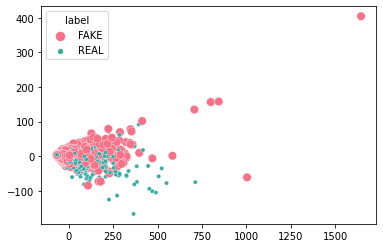

In [14]:
# plot the features
ax = sns.scatterplot(data2D[:,0], data2D[:,1], hue=train_y,size=train_y,palette="husl")

#Ngram-Level TF-IDF

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


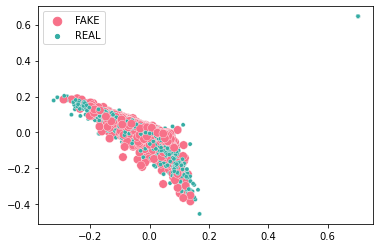

In [16]:
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), stop_words = 'english', max_features=5000)
tfidf_vect_ngram.fit(df['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)
# plot the features
pca = PCA(n_components=2).fit(tfidf_vect_ngram.transform(df['text']).toarray())
data2D = pca.transform(tfidf_vect_ngram.transform(df['text']).toarray())
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=df['label'].tolist(),size=df['label'].tolist(),palette="husl")

#characters level tf-idf

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


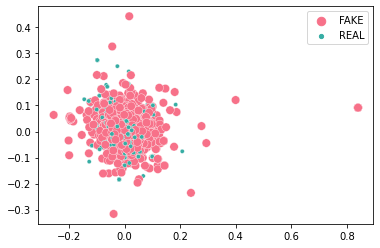

In [17]:
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', max_features=5000)
tfidf_vect_ngram_chars.fit(df['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 
# plot the features
pca = PCA(n_components=2).fit(tfidf_vect_ngram_chars.transform(df['text']).toarray())
data2D = pca.transform(tfidf_vect_ngram_chars.transform(df['text']).toarray())
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=df['label'].tolist(),size=df['label'].tolist(),palette="husl")

#Hashing Vector

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


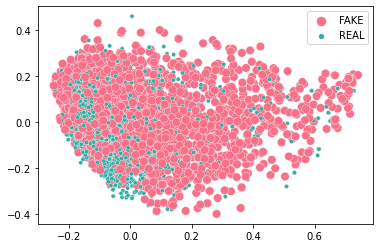

In [19]:
# getting train features
hash_vectorizer = HashingVectorizer(n_features=5000)
hash_vectorizer.fit(df['text'])
xtrain_hash_vectorizer =  hash_vectorizer.transform(train_x) 
xvalid_hash_vectorizer =  hash_vectorizer.transform(valid_x)
# plot the features
pca = PCA(n_components=2).fit(hash_vectorizer.transform(df['text']).toarray())
data2D = pca.transform(hash_vectorizer.transform(df['text']).toarray())
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=df['label'].tolist(),size=df['label'].tolist(),palette="husl")

In [23]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,y_test, vectorName, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    score = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, digits = 3)
    print(vectorName+f' Accuracy: {round(score*100,2)}%')
    print(report)

#Naive Bayes Algorithm

In [24]:
train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y,xvalid_count,valid_y,"Count Vector")

Count Vector Accuracy: 89.11%
              precision    recall  f1-score   support

        FAKE      0.907     0.862     0.884       609
        REAL      0.878     0.918     0.897       658

    accuracy                          0.891      1267
   macro avg      0.892     0.890     0.891      1267
weighted avg      0.892     0.891     0.891      1267



In [25]:
train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram,valid_y,"Ngram Vector")

Ngram Vector Accuracy: 88.87%
              precision    recall  f1-score   support

        FAKE      0.860     0.918     0.888       609
        REAL      0.919     0.862     0.889       658

    accuracy                          0.889      1267
   macro avg      0.889     0.890     0.889      1267
weighted avg      0.891     0.889     0.889      1267



In [26]:
train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,valid_y,"Ngram Char Vector")

Ngram Char Vector Accuracy: 79.08%
              precision    recall  f1-score   support

        FAKE      0.786     0.777     0.781       609
        REAL      0.795     0.804     0.800       658

    accuracy                          0.791      1267
   macro avg      0.791     0.790     0.790      1267
weighted avg      0.791     0.791     0.791      1267



#Logistic Regression